<a href="https://colab.research.google.com/github/lahmuddin/Machine-Learning-after-Middle-Test/blob/main/Week10/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lahmuddin_11038104028_TK-42-G6**

# **Learn The Basic**

In [1]:
pip install torch torchvision

## **Tensors**

In [2]:
import torch
import numpy as np

### Initializing a Tensor

In [3]:
#Directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [4]:
#From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
#From another tensor:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1924, 0.9947],
        [0.4541, 0.7348]]) 



In [6]:
#With random or constant values:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7069, 0.2951, 0.5529],
        [0.7420, 0.3717, 0.9386]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a Tensor

In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors

In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')


In [9]:
#Standard numpy-like indexing and slicing:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
#Joining Tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
#Arithmetic Operations
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [12]:
#Single-element tensors
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [13]:
#In-place operations
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridge with NumPy

In [14]:
#Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [15]:
#change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor

In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

In [17]:
#Changes in the NumPy array reflects in the tensor.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## **Dataset & Dataloaders**

In [18]:
#loading the dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

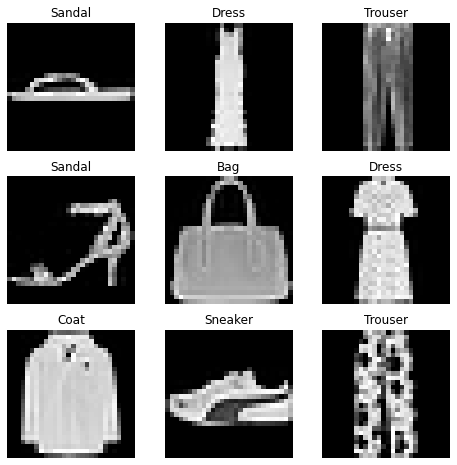

In [19]:
#Iterating and Visualizing the Dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
#Creating a Custom Dataset for your files
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [21]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [22]:
#len
def __len__(self):
    return len(self.img_labels)

In [23]:
#getitem
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


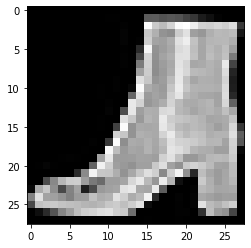

Label: 9


In [25]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## **Transforms**
We use transforms to perform some manipulation of the data and make it suitable for training.

In [26]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [27]:
#Lambda Transform
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

## **Build Model (Neural Network)**
 A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In [28]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
#Get Device for Training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [30]:
#Define Class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [31]:
#Print its structure
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [32]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


In [33]:
#Model Layers
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [34]:
#nn.Flatten
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [35]:
#nn.Linear
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [36]:
#nn.ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0323, -0.5818,  0.4135, -0.5126, -0.6399, -0.4618,  0.0046, -0.2500,
         -0.5373, -0.1008,  0.1066,  0.3562,  0.1516, -0.0986, -0.0836,  0.2448,
          0.2050, -0.0045,  0.2844,  0.0573],
        [-0.2738, -0.6686,  0.4016, -0.6172, -0.9247, -0.1923,  0.0342, -0.2613,
         -0.5253, -0.2130, -0.0216,  0.3646,  0.2112, -0.2271, -0.2975,  0.3353,
         -0.1681, -0.1371,  0.3244, -0.1098],
        [-0.0062, -0.5442,  0.6344, -0.4849, -0.7327, -0.5043, -0.0516,  0.2048,
         -0.4568, -0.0206,  0.1978,  0.4419,  0.1585, -0.2413, -0.1609,  0.1128,
          0.3596, -0.2675,  0.1490,  0.0499]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0323, 0.0000, 0.4135, 0.0000, 0.0000, 0.0000, 0.0046, 0.0000, 0.0000,
         0.0000, 0.1066, 0.3562, 0.1516, 0.0000, 0.0000, 0.2448, 0.2050, 0.0000,
         0.2844, 0.0573],
        [0.0000, 0.0000, 0.4016, 0.0000, 0.0000, 0.0000, 0.0342, 0.0000, 0.0000,
         0.0000, 0.0000, 0.3646, 0.2112, 0.0000, 0.00

In [37]:
#nn.Sequential
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [38]:
#nn.Softmax
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [39]:
#Model Parameters
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0239, -0.0047,  0.0307,  ..., -0.0022,  0.0074, -0.0270],
        [-0.0260, -0.0208,  0.0302,  ...,  0.0291, -0.0253,  0.0312]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0117,  0.0122], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0402,  0.0049,  0.0198,  ..., -0.0355,  0.0318,  0.0066],
        [ 0.0084,  0.0361, -0.0338,  ...,  0.0176,  0.0193,  0.0025]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias 

## **Automatic Differentiation With TORCH.AUTOGRAD**


In [40]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [41]:
#Tensors, Functions and Computational graph, A function that we apply to tensors to construct computational graph is in fact an object of class Function
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f6c58acf250>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f6c58acf290>


In [42]:
#Computing Gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1127, 0.3030, 0.3225],
        [0.1127, 0.3030, 0.3225],
        [0.1127, 0.3030, 0.3225],
        [0.1127, 0.3030, 0.3225],
        [0.1127, 0.3030, 0.3225]])
tensor([0.1127, 0.3030, 0.3225])


In [43]:
#Disabling Gradient Tracking
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [44]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## **Optimizing Model Parameters**
Training a model is an iterative process; in each iteration (called an epoch) the model makes a guess about the output, calculates the error in its guess (loss)

In [45]:
#Prerequisite Code
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [46]:
#Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [47]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [48]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
#Implementation
#define train_loop that loops over our optimization code, and test_loop that evaluates the model’s performance against our test data.
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.330901  [    0/60000]
loss: 2.304102  [ 6400/60000]
loss: 2.284340  [12800/60000]
loss: 2.263863  [19200/60000]
loss: 2.263690  [25600/60000]
loss: 2.225337  [32000/60000]
loss: 2.237440  [38400/60000]
loss: 2.205871  [44800/60000]
loss: 2.203329  [51200/60000]
loss: 2.165528  [57600/60000]
Test Error: 
 Accuracy: 34.3%, Avg loss: 2.163509 

Epoch 2
-------------------------------
loss: 2.187238  [    0/60000]
loss: 2.170324  [ 6400/60000]
loss: 2.110742  [12800/60000]
loss: 2.117714  [19200/60000]
loss: 2.088716  [25600/60000]
loss: 2.017099  [32000/60000]
loss: 2.048343  [38400/60000]
loss: 1.968809  [44800/60000]
loss: 1.975648  [51200/60000]
loss: 1.903395  [57600/60000]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.900418 

Epoch 3
-------------------------------
loss: 1.940610  [    0/60000]
loss: 1.908283  [ 6400/60000]
loss: 1.784008  [12800/60000]
loss: 1.822317  [19200/60000]
loss: 1.745489  [25600/60000]
loss: 1.671044  [32000/600

## **Save and Load The Model**

In [51]:
import torch
import torchvision.models as models

Saving and Loading Model Weights

In [52]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

In [53]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Saving and Loading Models with Shapes

In [54]:
torch.save(model, 'model.pth')

In [55]:
model = torch.load('model.pth')